# Descision Tree


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

wine = pd.read_csv('./wine.csv')
wine.head()
wine.info()
wine.describe()

# 1. 스케일이 다르다 (화이트와 레드)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [3]:
from sklearn.model_selection import train_test_split 

# 데이터 분리
X= wine[['alcohol', 'sugar', 'pH']]
y= wine['class'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((5197, 3), (1300, 3))

In [4]:
#스케일링 
#스케일링 
from sklearn.preprocessing import StandardScaler

#스케일러 객체 생성 
ss = StandardScaler()

# 훈련 세트의 통계(평균, 표준편차)를 사용하여 스케일러를 학습시키고 , 훈련세트를 변환한다.(데이터 누수 방지)
ss.fit(X_train) #오직 훈련 데이터에서만 수행해야함 , 테스트 정보가 학습과정에 유출되는  데이터 누수를 막기 위함 
X_train_scaled= ss.transform(X_train)
X_test_scaled= ss.transform(X_test)
#표준화는  머신러닝 모델의 성능을 향상시키기 위해 특성의 스케일을 뭐처 주는 전처리 과정이다. 

In [5]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train_scaled, y_train)


print('훈련점수: ', lr.score(X_train_scaled, y_train))
print('테스트점수: ',lr.score(X_test_scaled, y_test))

print(lr.classes_)
lr.predict_proba(X_test_scaled[:5])

print(lr.coef_, lr.intercept_)
      

훈련점수:  0.7808350971714451
테스트점수:  0.7776923076923077
[0. 1.]
[[ 0.51268071  1.67335441 -0.68775646]] [1.81773456]


In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)#학습 시킴

print('훈련덤수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))
#지니가 말하는 것은 

훈련덤수:  0.996921300750433
테스트점수:  0.8592307692307692


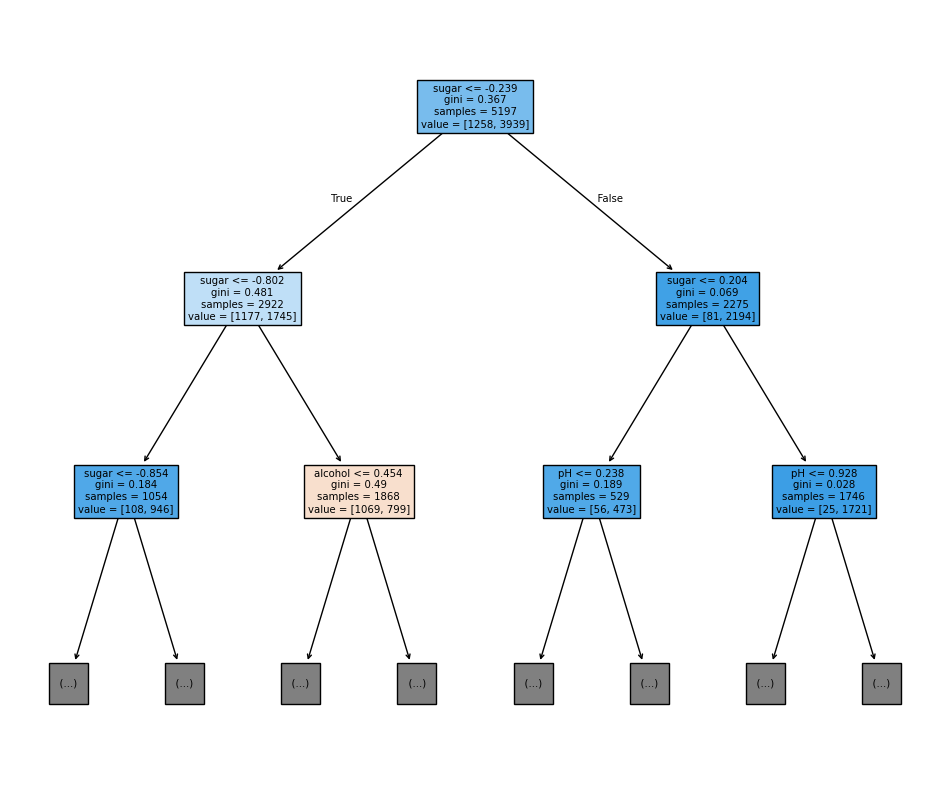

In [7]:
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH']) #표시되는 숫자는 스케일링된 값이다.
plt.show()
#지니 불순도(순수도) 를 보고 R/W 의 비율을 알 수 있음. 
# 지니 불순도 1- (음성클래스비율 ^2+ 양성클래스비율^2) >> 0.5에 가까우면 분류가 잘 안된것 , 0이나오면 
#-0.239 라는 기준은 지니 불순도를 최소화하는 방식으로 결정된다. 지니 불순도는 해당 노드에 포함된 클래스가 얼마나 섞여 있는지를 나타낸다 
#샘플 5197개 중에서 R/W를 분류하고 그 과정을 반복한다. 


훈련덤수:  0.6663459688281701
테스트점수:  0.6561538461538462


[Text(0.5, 0.875, 'sugar <= 4.325\ngini = 0.367\nsamples = 5197\nvalue = [1258, 3939]'),
 Text(0.25, 0.625, 'sugar <= 1.625\ngini = 0.481\nsamples = 2922\nvalue = [1177, 1745]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'sugar <= 1.375\ngini = 0.184\nsamples = 1054\nvalue = [108, 946]'),
 Text(0.0625, 0.125, 'gini = 0.032\nsamples = 555\nvalue = [9, 546]'),
 Text(0.1875, 0.125, 'gini = 0.318\nsamples = 499\nvalue = [99, 400]'),
 Text(0.375, 0.375, 'alcohol <= 11.025\ngini = 0.49\nsamples = 1868\nvalue = [1069, 799]'),
 Text(0.3125, 0.125, 'gini = 0.42\nsamples = 1141\nvalue = [798, 343]'),
 Text(0.4375, 0.125, 'gini = 0.468\nsamples = 727\nvalue = [271.0, 456.0]'),
 Text(0.75, 0.625, 'sugar <= 6.45\ngini = 0.069\nsamples = 2275\nvalue = [81, 2194]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'pH <= 3.255\ngini = 0.189\nsamples = 529\nvalue = [56, 473]'),
 Text(0.5625, 0.125, 'gini = 0.098\nsamples = 329\nvalue = [17, 312]'),
 Text(0.6875, 0.125, 'gini = 0.314\nsamples

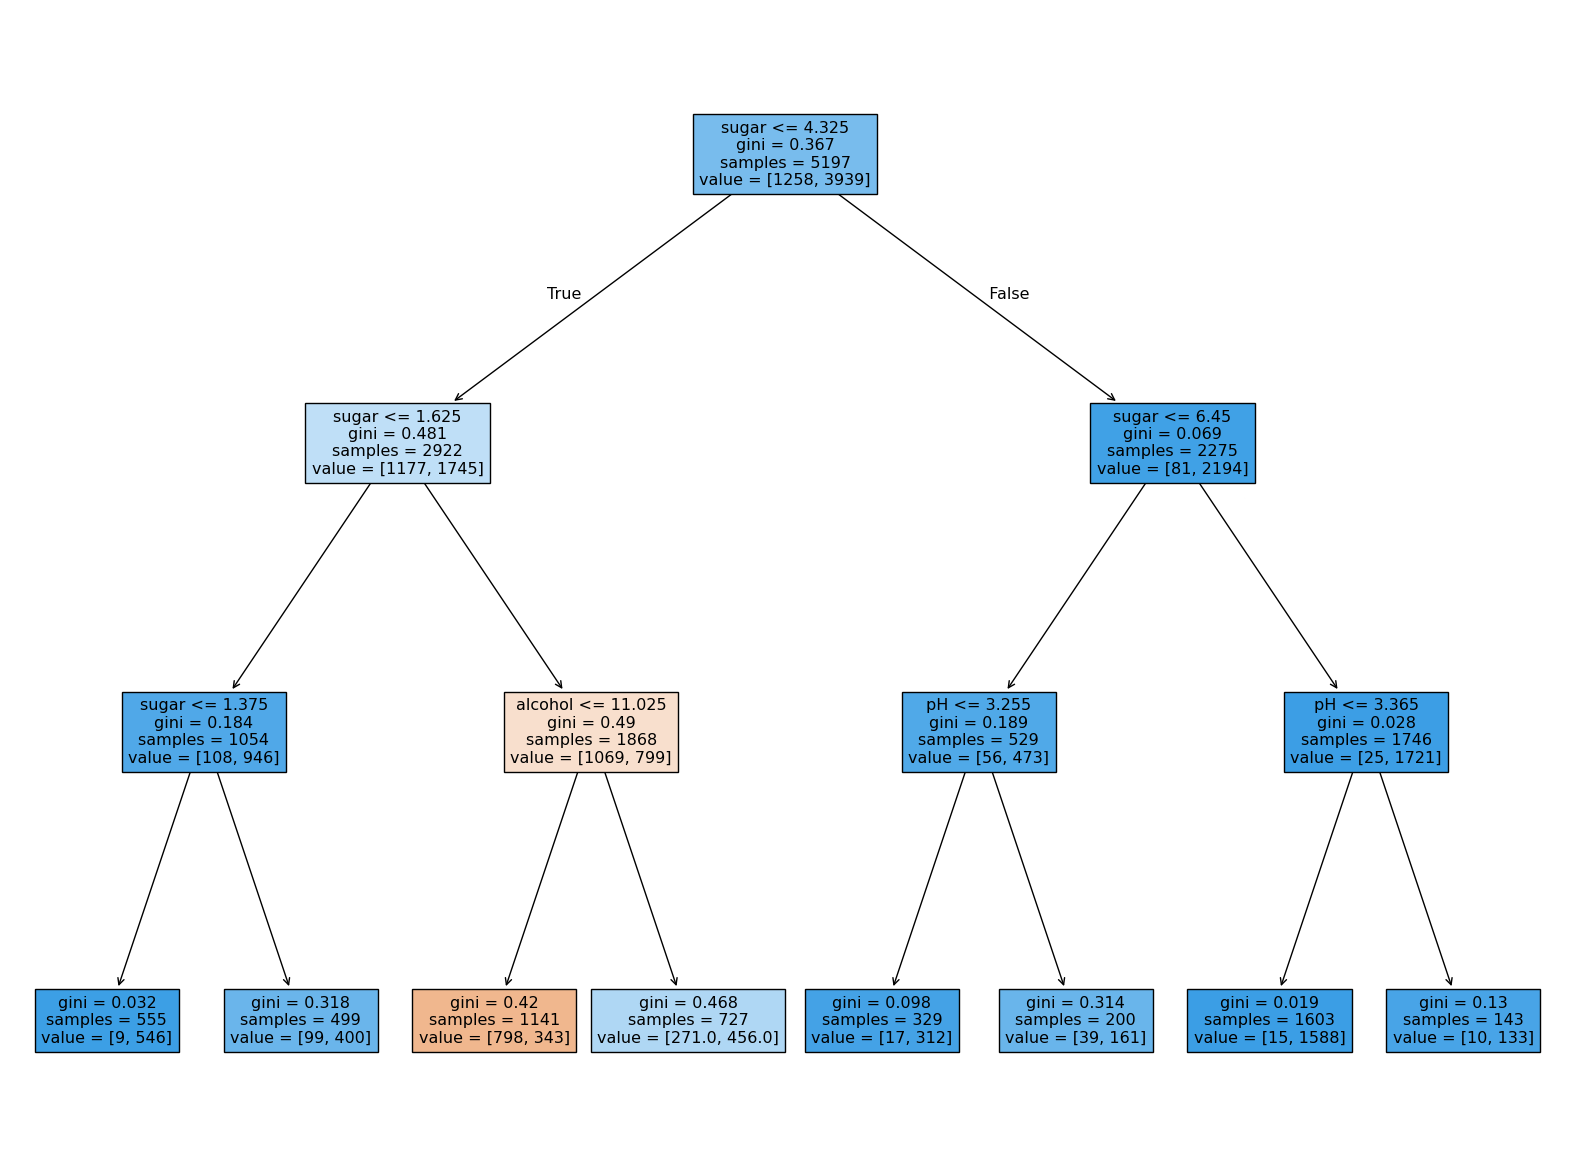

In [8]:
 # 발생할 수 있는 문제: 너무 테스트 점수를 높이기 위해 하이퍼파라미터를 튜닝하는 것도 오버피팅이 아닐까? 
dt= DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)
print('훈련덤수: ', dt.score(X_train_scaled, y_train))
print('테스트점수: ', dt.score(X_test_scaled, y_test))

plt.figure(figsize=(20,15))
plot_tree(dt, filled =True, feature_names=['alcohol', 'sugar', 'pH'])

- 언제 정지하느냐 
1. 특성에 대해 다 시도해 보았을 때 
2. 리프노드 ->순수노드 (예시 부정입학)
3. 지니가 거의 고정이 될때 

## 교차 검증(Cross  Validation)

테스트 셋 모델 검증 마지막 단계에서 한번만 확인. 


In [9]:
# 훈련셋| 검증셋 | 테스트셋 
# 80%              20%
# 60%     20%      20%


In [10]:
wine= pd.read_csv('./wine.csv')
X= wine[['alcohol', 'sugar', 'pH']]
y = wine['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42) # 20%를 테스트 데이터로 사용하고 나머지를 훈련할 거다. 
#전체테스트 셋을 모델 의 최종 성능 평가에 사용, 학습과정에는 사용안됨 

In [12]:
X_sub, X_val, y_sub, y_val = train_test_split(X, y,test_size=0.25, random_state=42)
# 75는 훈련/검증에 쓰일 하위 데이터고, 25는 검증용 데이터이다.
#모델 학습 중간과정에서 하이퍼파라미터 튜닝 및 모델 선택에 사용된다. 

In [13]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_sub, y_sub)
print('훈련: ', dt.score(X_sub, y_sub))
print('검증: ', dt.score(X_val, y_val))

훈련:  0.9973316912972086
검증:  0.8516923076923076


In [14]:
#검증셋에 있는 것도 쪼개서 훈련이 가능한 교차검증 데이터의 8~90% 훈련해 볼 수 있음
#k-fold cross validation(데이터를 쪼개서 훈련-검증 데이터를 바꿔가며 훈련진행-> 점수 평균)
from sklearn.model_selection import cross_validate

scores = cross_validate(dt, X_train, y_train )
display(scores)
print(np.mean(scores['test_score']))
#score time은 훈련시간이고, fit은 학습시간 

#그리드 서치 안에 포함된 값들을 출력한다. 
"""
fit_time: 각 하이퍼 파라미터 조합에 대해 모델을 학습 (fit)하는데 걸린시간
score_time: 교차검증 과정에서 모델이 predict/ score 하는 데 걸린시간(예측속도를 간접적으로 보여준다)
test_score: 교차 검증 과정에서 얻은 점수(기본은 accuracy, 혹은 지정한 scoring 함수)
"""

{'fit_time': array([0.00788307, 0.00623894, 0.00522089, 0.00543094, 0.0051899 ]),
 'score_time': array([0.00090981, 0.00096607, 0.00085187, 0.00089812, 0.00072718]),
 'test_score': array([0.87019231, 0.84615385, 0.87680462, 0.84889317, 0.83541867])}

0.8554925223957948


'\nfit_time: 각 하이퍼 파라미터 조합에 대해 모델을 학습 (fit)하는데 걸린시간\nscore_time: 교차검증 과정에서 모델이 predict/ score 하는 데 걸린시간(예측속도를 간접적으로 보여준다)\ntest_score: 교차 검증 과정에서 얻은 점수(기본은 accuracy, 혹은 지정한 scoring 함수)\n'

In [ ]:
# 폴드 기본값 5가 아닌 다른 값을 쓰고 싶을 경우 (기본 교차 검증방식 커스터 마이징 )
from sklearn.model_selection import StratifiedKFold ## 단순히 k개로 나누는게 아니라 
# 클래스 비율(레이블 분포)를 유지하면서 나눔 
#                                       접기 전에 최초 1회 셔플링    
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_validate(dt, X_train, y_train, cv=splitter)
print(np.mean(scores['test_score']))

0.8581873425226026


# 하이퍼 파라미터 튜닝
1. GridSearch를 진행할 하이퍼 파라미터 선택
2. 그리드 서치 수행(fit)
3. 최적 조합을 찾고, gs 객체에 저장됨,
4. 그리드 서치는 최상의 매개변수에서, 전체 훈련세트를 사용해 최종 모델을 훈련 

In [18]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_impurity_decrease': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006],
} ## 하이퍼파라미터 후보 값들 , 여러값으로 지정
                  
gs = GridSearchCV(
    DecisionTreeClassifier(random_state=42),  # 모델
    param_grid=params,  # 확인할 하이퍼파라미터의 이름: 값들
    n_jobs=-1,  # CPU 최대 코어
)

gs.fit(X_train, y_train) #여기서 그리드서치가 실제로 동작함 

# Grid Search 결과 가장 좋은 파라미터 조합으로 모델 만들기
print(gs.best_params_, gs.cv_results_['mean_test_score']) #각 파라미터 조합별 평균 검증 성능 

dt = gs.best_estimator_ #최적의 파라미터를 적용한 최종 모델
dt.score(X_train, y_train) #과적합 여부를 보기 위해 X_test와 비교함 

{'min_impurity_decrease': 0.0001} [0.86800067 0.86453617 0.86492226 0.86780891 0.86761605 0.86338306]


0.9615162593804117

## 코드 요약 
* GridSearchCV를 이용해서 
    1. min_impurity_decrease 후보값들을 모두 테스트
    2. 교차 검증으로 성능을 비교해서 가장 좋은 값(best_params_)을 찾은뒤 
    3. 최적모델(best_estimator_)을 저장해서 성능을 평가 하는 과정 
- 즉 , 의사결정트리 모델의 하이퍼파라미터 최적화 및 최적 모델 학습을 수행하는 코드였음.

In [ ]:
params = {
    # 노드 분할을 위한 최소 불순도
    'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001),
    # 트리 깊이
    'max_depth': range(5, 20, 1),
    # 노드를 나누기 위한 최소 샘플 수
    'min_samples_split': range(2, 100, 10),
}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42), params, n_jobs=-1)
gs.fit(X_train, y_train)

print(gs.best_params_)

## 코드 요약 
의사결정트리의 하이퍼파라미터를 탐색해서 가장 좋은 조합을 찾는 과정 
- min_impurity_decrease: 노드를 분할할지 결정하는 기준(작을수록 복잡한 트리임)
- max_depth 트리의 최대 깊이 
- min_samples_split: 노드를 나누기 위한 최소 샘플 수 
 

In [19]:
# 내부 교차검증 결과 가장 높은 평균 점수
np.max(gs.cv_results_['mean_test_score'])

# 모든 하이퍼파라미터 교차검증 끝에 찾은 학습이 끝난 최고의 모델
dt_best = gs.best_estimator_
# 로 아껴놨던 테스트 진행 -> 점수
dt_best.score(X_test, y_test)

0.8653846153846154

코드요약
- 교차검증으로 뽑힌 최적 모델(best_estimator_)을 아껴둔 진짜 테스트셋에 적용.
- 이 테스트셋은 처음부터 훈련에 전혀 사용되지 않았기 때문에 최종 성능 검증(Generalization Test) 용으로 가장 공정함.
- 여기서 얻는 점수가 실제 배포 후 성능을 가장 가깝게 예측하는 지표가 됨.
궁금한 것 정리
* 왜 마지막에 테스트셋을 쓰는가? 
- 그리드서치는 내부적으로 교차검증을 통해 성능이 좋은 하이퍼파라미터 조합을 찾음, 
- 교차 검증에 사용된 데이터는 모두 훈련 데이터(X_train, y_train) 안에서만 나눠 쓰는 것이다. 
- 교차 검증 점수는" 훈련 데이터 기반" 성능 일뿐 진짜 새로운 데이터에서 잘작동하는지 보장하지 않으므로 진짜 테스트셋에 적용해야함 